<a href="https://colab.research.google.com/github/benjaminsw/generic-VI/blob/main/VI_code_sample_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


In this notebook, I aim to examine generic variational inference code. The first code is from: https://zhiyzuo.github.io/VI/


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
class UGMM(object):
    '''Univariate GMM with CAVI'''
    def __init__(self, X, K=2, sigma=1):
        self.X = X
        self.K = K
        self.N = self.X.shape[0]
        self.sigma2 = sigma**2

    def _init(self):
        self.phi = np.random.dirichlet([np.random.random()*np.random.randint(1, 10)]*self.K, self.N)
        self.m = np.random.randint(int(self.X.min()), high=int(self.X.max()), size=self.K).astype(float)
        self.m += self.X.max()*np.random.random(self.K)
        self.s2 = np.ones(self.K) * np.random.random(self.K)
        print('Init mean')
        print(self.m)
        print('Init s2')
        print(self.s2)

    def get_elbo(self):
        t1 = np.log(self.s2) - self.m/self.sigma2
        t1 = t1.sum()
        t2 = -0.5*np.add.outer(self.X**2, self.s2+self.m**2)
        t2 += np.outer(self.X, self.m)
        t2 -= np.log(self.phi)
        t2 *= self.phi
        t2 = t2.sum()
        return t1 + t2

    def fit(self, max_iter=100, tol=1e-10):
        self._init()
        self.elbo_values = [self.get_elbo()]
        self.m_history = [self.m]
        self.s2_history = [self.s2]
        for iter_ in range(1, max_iter+1):
            self._cavi()
            self.m_history.append(self.m)
            self.s2_history.append(self.s2)
            self.elbo_values.append(self.get_elbo())
            if iter_ % 5 == 0:
                print(iter_, self.m_history[iter_])
            if np.abs(self.elbo_values[-2] - self.elbo_values[-1]) <= tol:
                print('ELBO converged with ll %.3f at iteration %d'%(self.elbo_values[-1],
                                                                     iter_))
                break

        if iter_ == max_iter:
            print('ELBO ended with ll %.3f'%(self.elbo_values[-1]))


    def _cavi(self):
        self._update_phi()
        self._update_mu()

    def _update_phi(self):
        t1 = np.outer(self.X, self.m)
        t2 = -(0.5*self.m**2 + 0.5*self.s2)
        exponent = t1 + t2[np.newaxis, :]
        self.phi = np.exp(exponent)
        self.phi = self.phi / self.phi.sum(1)[:, np.newaxis]

    def _update_mu(self):
        self.m = (self.phi*self.X[:, np.newaxis]).sum(0) * (1/self.sigma2 + self.phi.sum(0))**(-1)
        assert self.m.size == self.K
        #print(self.m)
        self.s2 = (1/self.sigma2 + self.phi.sum(0))**(-1)
        assert self.s2.size == self.K

In [4]:
num_components = 3
mu_arr = np.random.choice(np.arange(-10, 10, 2),
                          num_components) +\
         np.random.random(num_components)
mu_arr

array([-9.88869593,  4.2001092 , -5.97147041])

In [5]:
SAMPLE = 1000

In [6]:
X = np.random.normal(loc=mu_arr[0], scale=1, size=SAMPLE)
for i, mu in enumerate(mu_arr[1:]):
    X = np.append(X, np.random.normal(loc=mu, scale=1, size=SAMPLE))

<ipython-input-9-78cbbf7be79c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[:SAMPLE], ax=ax, rug=True)
<ipython-input-9-78cbbf7be79c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[SAMPLE:SAMPLE*2], ax=ax, rug=True)
<ipython-input-9-78cbbf7be79c>:4: UserWarning: 

`distplot` is a depre

<Axes: ylabel='Density'>

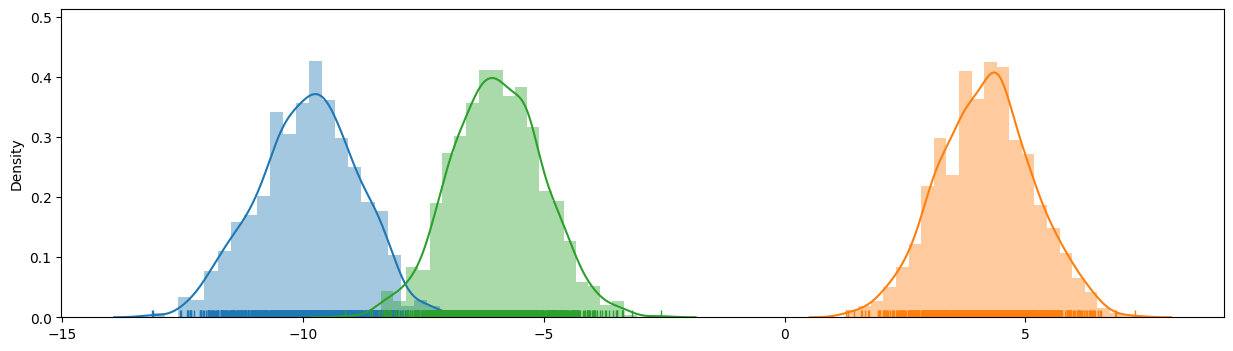

In [9]:
fig, ax = plt.subplots(figsize=(15, 4))
sns.distplot(X[:SAMPLE], ax=ax, rug=True)
sns.distplot(X[SAMPLE:SAMPLE*2], ax=ax, rug=True)
sns.distplot(X[SAMPLE*2:], ax=ax, rug=True)

In [10]:
ugmm = UGMM(X, 3)
ugmm.fit()

Init mean
[ 0.6019789   6.31362347 -6.4996514 ]
Init s2
[0.29518979 0.63262914 0.29720734]
5 [ 3.85773062  4.48716297 -7.92450701]
10 [ 3.97470713  4.3721088  -7.92450274]
15 [ 4.02745454  4.31969896 -7.92450196]
20 [ 4.05975914  4.28754562 -7.92450165]
25 [ 4.08226078  4.26512604 -7.92450149]
30 [ 4.09905255  4.24838344 -7.9245014 ]
35 [ 4.11210956  4.23535767 -7.92450135]
40 [ 4.12253094  4.22495687 -7.92450131]
45 [ 4.13099296  4.21650875 -7.92450129]
50 [ 4.13794422  4.20956701 -7.92450127]
55 [ 4.14370012  4.20381772 -7.92450126]
60 [ 4.14849264  4.19902982 -7.92450125]
65 [ 4.15249849  4.19502723 -7.92450124]
70 [ 4.1558559   4.19167211 -7.92450124]
75 [ 4.15867524  4.18885438 -7.92450124]
80 [ 4.16104598  4.18648479 -7.92450123]
85 [ 4.16304141  4.18449018 -7.92450123]
90 [ 4.16472209  4.18281007 -7.92450123]
95 [ 4.16613837  4.1813942  -7.92450123]
100 [ 4.16733226  4.18020061 -7.92450123]
ELBO ended with ll -4662.532


In [11]:
ugmm.phi.argmax(1)

array([2, 2, 2, ..., 2, 2, 2])

In [12]:
sorted(mu_arr)

[-9.88869592660838, -5.971470411641035, 4.200109199550838]

<ipython-input-13-1205d357d0ed>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[:SAMPLE], ax=ax, hist=True, norm_hist=True)
<ipython-input-13-1205d357d0ed>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.random.normal(ugmm.m[0], 1, SAMPLE), color='k', hist=False, kde=True)
<ipyth

<Axes: ylabel='Density'>

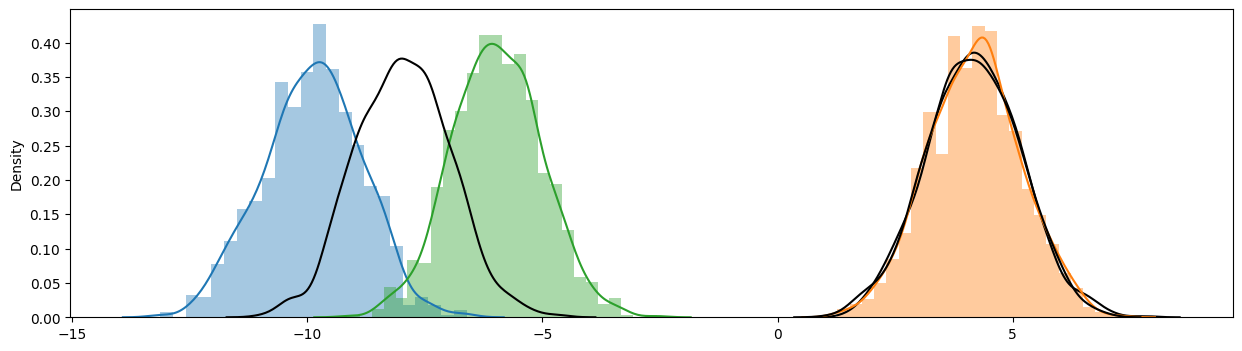

In [13]:
fig, ax = plt.subplots(figsize=(15, 4))
sns.distplot(X[:SAMPLE], ax=ax, hist=True, norm_hist=True)
sns.distplot(np.random.normal(ugmm.m[0], 1, SAMPLE), color='k', hist=False, kde=True)
sns.distplot(X[SAMPLE:SAMPLE*2], ax=ax, hist=True, norm_hist=True)
sns.distplot(np.random.normal(ugmm.m[1], 1, SAMPLE), color='k', hist=False, kde=True)
sns.distplot(X[SAMPLE*2:], ax=ax, hist=True, norm_hist=True)
sns.distplot(np.random.normal(ugmm.m[2], 1, SAMPLE), color='k', hist=False, kde=True)